# EU Tech Salary Analysis

As we know, all around the world, tech company always can offer a great salary package, especially in US. As an important region in the world, with many developed countries, what is the salary in tech companies in EU? We will look deep into it.

First, we will import some useful package for our analysis.

In [1]:
from itertools import groupby

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

Then we import the file that we use for our analysis, and open it as DataFrame, easy for future analysis

In [2]:
path = "/Users/alfonsoqu/Desktop/ASU/2024Fall/DAT301/Project2/ITSalarySurveyEU2020.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


My first attraction is age, I am wondering what is range of age that people working in EU. I decided to use a histogram plot to have a clear view

(array([ 50., 332., 459., 262.,  83.,  28.,   6.,   3.,   0.,   3.]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <BarContainer object of 10 artists>)

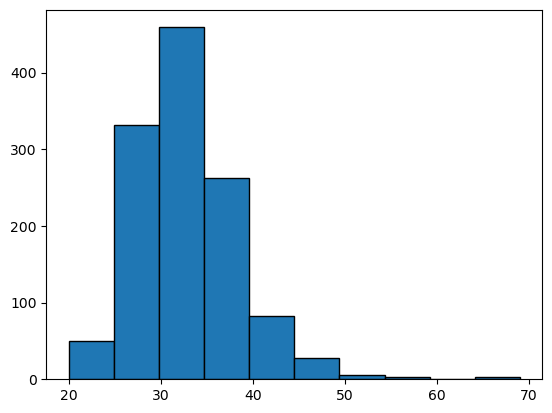

In [5]:
age = df['Age']
plt.hist(age, edgecolor='black')

As we can see in this plot, most people in EU working in Tech companies are around 25 to 40 years.

There are many countries in EU, since this data frame is about Tech company, which country or city has the most tech position? Let's find out

In [4]:
city = df['City']
city.value_counts()

City
Berlin         681
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: count, Length: 119, dtype: int64

Perhaps this report mainly interviewed people in Germany, but it truly shows in Germany, it has the most tech companies, especially in Berlin.

Then we want to know what area exactly they are working on. We will use the same strategy to find out.

In [5]:
pos=df['Position']
pos.value_counts()

Position
Software Engineer            387
Backend Developer            174
Data Scientist               110
Frontend Developer            89
QA Engineer                   71
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: count, Length: 148, dtype: int64

Software Engineer has the largest amount, following by Backend and Developer.

But I am curious how many years these SDE have been working? I will use a plot to find out the answer.

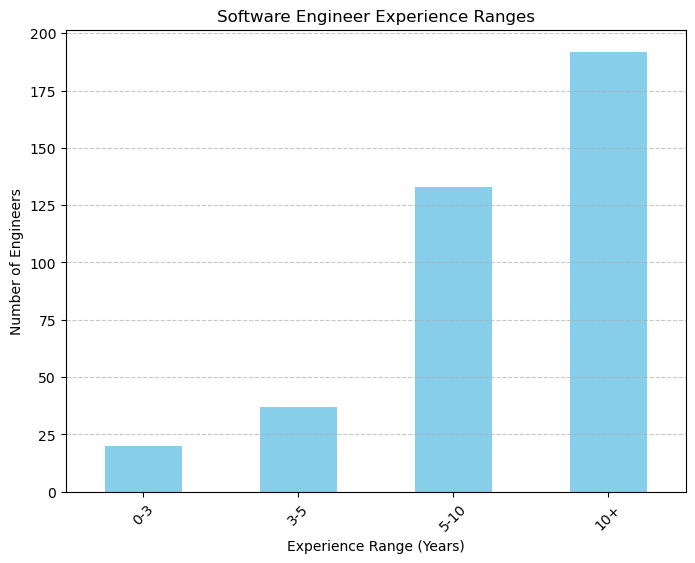

In [6]:
# Filter only rows where Position is 'Software Engineer'
software_engineers = df.loc[df['Position'] == 'Software Engineer'].copy()

# Handle the parsing issue by replacing commas with dots and converting to numeric
software_engineers['Total years of experience'] = software_engineers['Total years of experience'].replace(',', '.', regex=True)
software_engineers['Total years of experience'] = pd.to_numeric(
    software_engineers['Total years of experience'], errors='coerce'
)

# Define bins and labels for categorization
bins = [0, 3, 5, 10, float('inf')]
labels = ['0-3', '3-5', '5-10', '10+']

# Categorize years of experience into defined bins
software_engineers.loc[:, 'Experience Range'] = pd.cut(
    software_engineers['Total years of experience'], bins=bins, labels=labels, right=False
)

# Count occurrences by experience range
experience_counts = software_engineers['Experience Range'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(8, 6))
experience_counts.plot(kind='bar', color='skyblue')
plt.title('Software Engineer Experience Ranges')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Number of Engineers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Speaking about Tech jobs, most of them need to do programming, we want to analysis what is the programming they are use for work.

In [7]:
# Normalize the data by converting to lowercase and stripping spaces
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.lower().str.strip()

# Recount occurrences
normalized_technology_counts = df['Your main technology / programming language'].value_counts().sort_values(ascending=False)

normalized_technology_counts

Your main technology / programming language
python                    212
java                      196
javascript                 80
php                        71
c++                        41
                         ... 
.net, angular               1
atlassian jira              1
qlik                        1
kuberenetes, openstack      1
consumer analysis           1
Name: count, Length: 208, dtype: int64

Finally we step to salary, because most of employee in this data set are SDE, I want to find out which position have the most income.

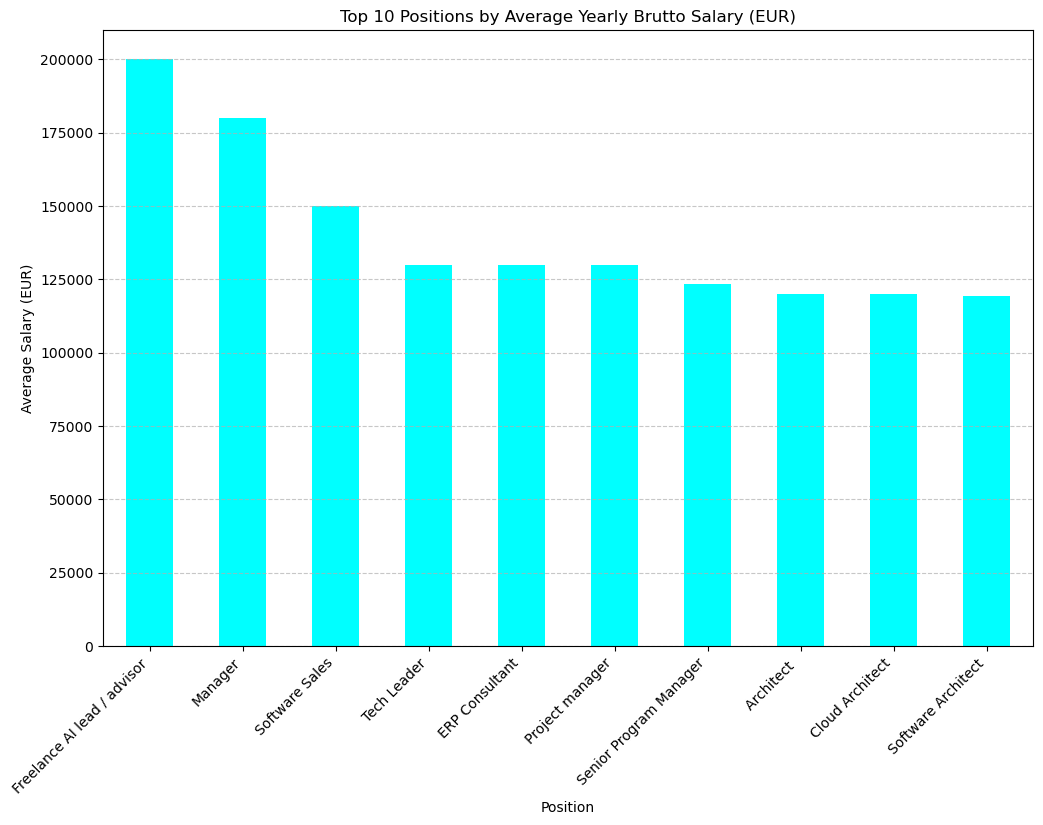

In [6]:
filtered_df = df[df['Yearly brutto salary (without bonus and stocks) in EUR'] < 300000]

# Recalculate average salary by position
filtered_salary_by_position = filtered_df.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
filtered_salary_by_position.head(10).plot(kind='bar', color='aqua')
plt.title('Top 10 Positions by Average Yearly Brutto Salary (EUR)')
plt.xlabel('Position')
plt.ylabel('Average Salary (EUR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Looks like SDE is not the position with most income in Top 10. The most income position are management positions and architect(cloud, software). It make sense because these positions does need more experiences and knowledge.

I am wondering which city and which position has the highes payment.

In [9]:
# Convert the salary column to numeric by removing commas and handling errors
df['Yearly brutto salary (without bonus and stocks) in EUR'] = df['Yearly brutto salary (without bonus and stocks) in EUR'].replace(',', '', regex=True).astype(float)

# Group by Position and City, then calculate the average salary
salary_by_position_location = df.groupby(['Position', 'City'])['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort the results by average salary in descending order
salary_by_position_location_sorted = salary_by_position_location.sort_values(
    by='Yearly brutto salary (without bonus and stocks) in EUR', ascending=False
)

# Find the position with the highest salary and its location
highest_salary_row = salary_by_position_location_sorted.iloc[0]

# Extract the relevant information
highest_paid_position = highest_salary_row['Position']
highest_paid_city = highest_salary_row['City']
highest_paid_salary = highest_salary_row['Yearly brutto salary (without bonus and stocks) in EUR']

# Display the results
print(f"Position with the highest salary: {highest_paid_position}")
print(f"Location: {highest_paid_city}")
print(f"Yearly Brutto Salary: €{highest_paid_salary:,.2f}")

Position with the highest salary: ML Engineer
Location: Cologne
Yearly Brutto Salary: €250,025,500.00


Looks like this salary is an outlier, Let's take it out and do this again

In [10]:
# Clean the column names by stripping extra whitespace
df.columns = df.columns.str.strip()

# Convert the salary column to numeric by removing commas and handling errors
df['Yearly brutto salary (without bonus and stocks) in EUR'] = df['Yearly brutto salary (without bonus and stocks) in EUR'].replace(',', '', regex=True).astype(float)

# Group by Position and City, then calculate the average salary
salary_by_position_location = df.groupby(['Position', 'City'])['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort the results by average salary in descending order
salary_by_position_location_sorted = salary_by_position_location.sort_values(
    by='Yearly brutto salary (without bonus and stocks) in EUR', ascending=False
)

# Remove the outlier with an extremely high salary
filtered_salary_by_position_location = salary_by_position_location_sorted[salary_by_position_location_sorted['Yearly brutto salary (without bonus and stocks) in EUR'] < 1e7]

# Find the position with the highest salary after removing the outlier
highest_salary_filtered_row = filtered_salary_by_position_location.iloc[0]

# Extract relevant information
highest_paid_position_filtered = highest_salary_filtered_row['Position']
highest_paid_city_filtered = highest_salary_filtered_row['City']
highest_paid_salary_filtered = highest_salary_filtered_row['Yearly brutto salary (without bonus and stocks) in EUR']

# Display the results
print(f"Position with the highest salary (after removing outliers): {highest_paid_position_filtered}")
print(f"Location: {highest_paid_city_filtered}")
print(f"Yearly Brutto Salary: €{highest_paid_salary_filtered:,.2f}")

Position with the highest salary (after removing outliers): Software Engineer
Location: Cupertino
Yearly Brutto Salary: €250,000.00


This is more reasonable result. Now I have another question, what about their salary growth? Will they receive more payment in next year?

In [11]:
# Prepare the DataFrame for salary growth analysis
salary_growth_df = df[[
    'Yearly brutto salary (without bonus and stocks) in EUR',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
]].dropna()

# Convert both salary columns to numeric by removing commas
salary_growth_df['Yearly brutto salary (without bonus and stocks) in EUR'] = salary_growth_df['Yearly brutto salary (without bonus and stocks) in EUR'].replace(',', '', regex=True).astype(float)
salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'] = salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].replace(',', '', regex=True).astype(float)

# Calculate salary growth percentage
salary_growth_df['Salary Growth (%)'] = (
    (salary_growth_df['Yearly brutto salary (without bonus and stocks) in EUR'] -
     salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'])
    / salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country']
) * 100

# Filter out unrealistic growth values (e.g., below -100% or above 500%)
filtered_salary_growth_df = salary_growth_df[
    (salary_growth_df['Salary Growth (%)'] >= -100) & (salary_growth_df['Salary Growth (%)'] <= 500)
]

# Calculate the average salary growth
average_growth = filtered_salary_growth_df['Salary Growth (%)'].mean()

# Display the top 10 salary growth records
top_salary_growth = filtered_salary_growth_df.sort_values(by='Salary Growth (%)', ascending=False).head(10)
print("Top 10 Salary Growth Records:")
print(top_salary_growth)

# Print the average salary growth
print(f"\nAverage Salary Growth: {average_growth:.2f}%")

Top 10 Salary Growth Records:
      Yearly brutto salary (without bonus and stocks) in EUR  \
896                                             45000.0        
455                                             50000.0        
1140                                            40000.0        
574                                            200000.0        
420                                             58000.0        
751                                            135000.0        
1075                                            40700.0        
712                                             22000.0        
35                                             150000.0        
193                                            120000.0        

      Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country  \
896                                             12000.0                                                          
455                                  

Let's use a plot to have a clear view

Average Salary Growth: 11.23%


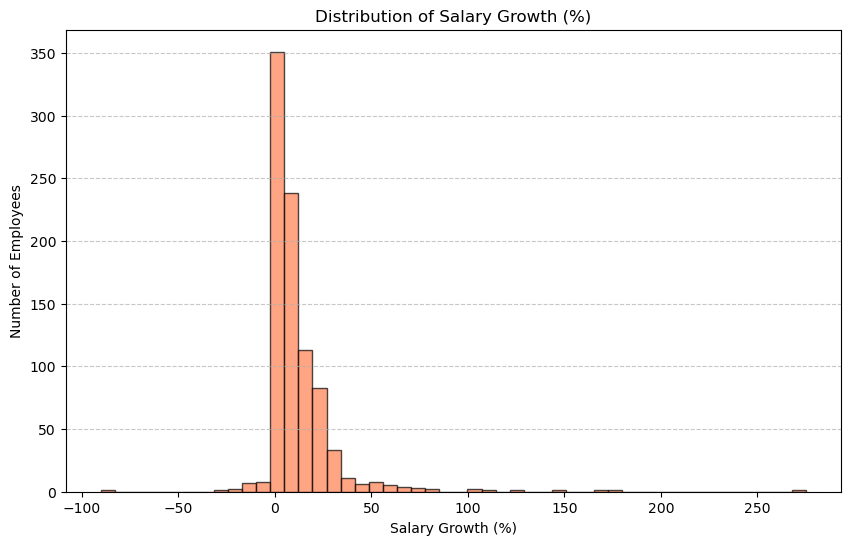

In [7]:
# Prepare the DataFrame for salary growth analysis
salary_growth_df = df[[
    'Yearly brutto salary (without bonus and stocks) in EUR',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
]].dropna()

# Convert both salary columns to numeric by removing commas
salary_growth_df['Yearly brutto salary (without bonus and stocks) in EUR'] = salary_growth_df['Yearly brutto salary (without bonus and stocks) in EUR'].replace(',', '', regex=True).astype(float)
salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'] = salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].replace(',', '', regex=True).astype(float)

# Calculate salary growth percentage
salary_growth_df['Salary Growth (%)'] = (
    (salary_growth_df['Yearly brutto salary (without bonus and stocks) in EUR'] -
     salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'])
    / salary_growth_df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country']
) * 100

# Filter out unrealistic growth values (e.g., below -100% or above 500%)
filtered_salary_growth_df = salary_growth_df[
    (salary_growth_df['Salary Growth (%)'] >= -100) & (salary_growth_df['Salary Growth (%)'] <= 500)
]

# Calculate the average salary growth
average_growth = filtered_salary_growth_df['Salary Growth (%)'].mean()

# Display the average salary growth
print(f"Average Salary Growth: {average_growth:.2f}%")

# Plot the distribution of salary growth
plt.figure(figsize=(10, 6))
plt.hist(filtered_salary_growth_df['Salary Growth (%)'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Salary Growth (%)')
plt.xlabel('Salary Growth (%)')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This is all of our analysis. Thank you!